In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Data Collection and Initial Preparation
# Load the dataset
data = pd.read_csv('balanced_love_compatibility_dataset.csv')

In [3]:
data.head()

Boy_Name Girl_Name  Boy_Age  Girl_Age Boy_FavColor Girl_FavColor  Boy_Hobby  \
0   Daniel    Amelia       63        63        Brown        Yellow    Cooking   
1    Ethan  Isabella       81        83       Purple        Purple     Gaming   
2   Elijah   Abigail       29        26        Green         Green    Fishing   
3   Daniel     Nancy       34        36       Purple        Purple    Fishing   
4   Robert   Jessica       46        46         Blue          Pink  Traveling   

  Girl_Hobby Boy_FavMovieGenre Girl_FavMovieGenre Boy_Zodiac Girl_Zodiac  \
0    Cooking         Adventure          Adventure  Capricorn       Virgo   
1     Gaming           Fantasy            Fantasy  Capricorn      Taurus   
2    Fishing            Horror             Horror      Libra      Gemini   
3    Fishing             Drama              Drama     Gemini    Aquarius   
4  Traveling            Comedy             Comedy    Scorpio      Cancer   

   Compatibility_Score  
0                 90.0  
1                 97.0  
2                 95.5  
3                 97.0  
4                 90.0

In [5]:
# Display initial dataset information
print("Initial Dataset Information:")
display(data.info())

Initial Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Boy_Name             30000 non-null  object 
 1   Girl_Name            30000 non-null  object 
 2   Boy_Age              30000 non-null  int64  
 3   Girl_Age             30000 non-null  int64  
 4   Boy_FavColor         30000 non-null  object 
 5   Girl_FavColor        30000 non-null  object 
 6   Boy_Hobby            30000 non-null  object 
 7   Girl_Hobby           30000 non-null  object 
 8   Boy_FavMovieGenre    30000 non-null  object 
 9   Girl_FavMovieGenre   30000 non-null  object 
 10  Boy_Zodiac           30000 non-null  object 
 11  Girl_Zodiac          30000 non-null  object 
 12  Compatibility_Score  30000 non-null  float64
dtypes: float64(1), int64(2), object(10)
memory usage: 3.0+ MB


None

In [6]:
display("\nMissing Values:\n", data.isnull().sum())

'\nMissing Values:\n'

Boy_Name               0
Girl_Name              0
Boy_Age                0
Girl_Age               0
Boy_FavColor           0
Girl_FavColor          0
Boy_Hobby              0
Girl_Hobby             0
Boy_FavMovieGenre      0
Girl_FavMovieGenre     0
Boy_Zodiac             0
Girl_Zodiac            0
Compatibility_Score    0
dtype: int64

In [7]:
# Data Cleaning
# Remove duplicate entries
data.drop_duplicates(inplace=True)

In [8]:
# Data Validation and Filtering
data = data[
    (data['Boy_Age'] >= 18) & (data['Boy_Age'] <= 90) &
    (data['Girl_Age'] >= 18) & (data['Girl_Age'] <= 90) &
    (data['Compatibility_Score'] >= 0) & (data['Compatibility_Score'] <= 100)
]

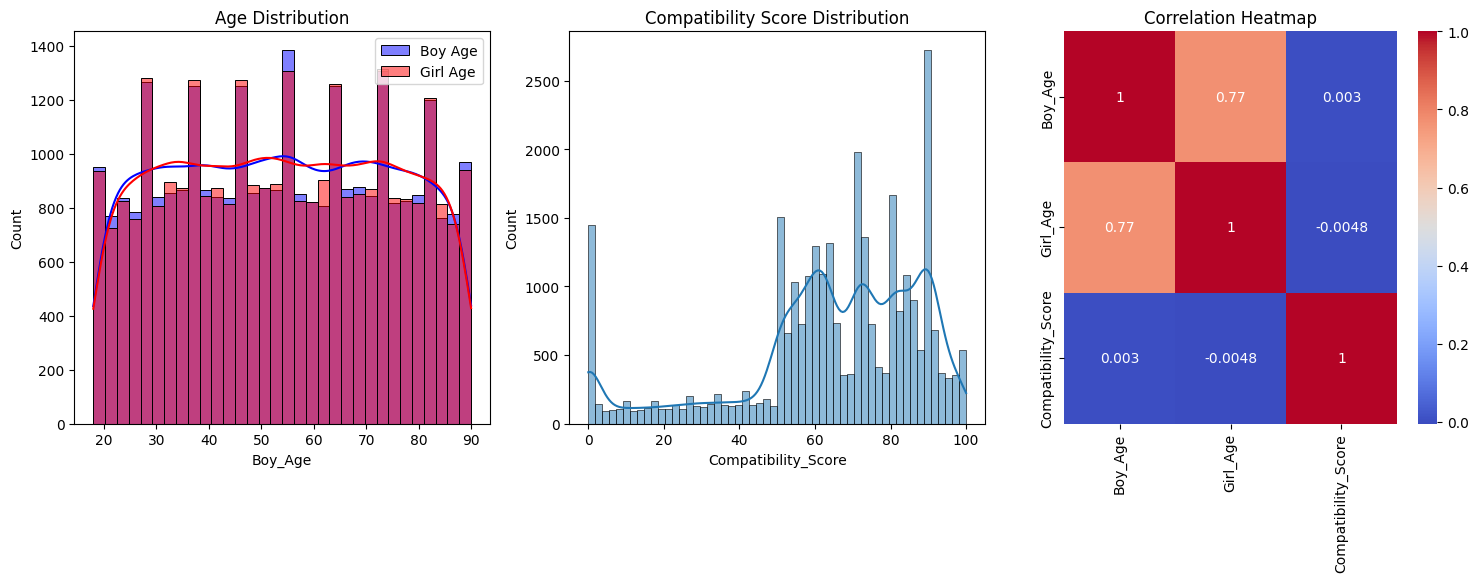

In [9]:
# Exploratory Data Analysis
plt.figure(figsize=(15, 10))

# Age Distribution
plt.subplot(2, 3, 1)
sns.histplot(data['Boy_Age'], kde=True, color='blue', alpha=0.5, label='Boy Age')
sns.histplot(data['Girl_Age'], kde=True, color='red', alpha=0.5, label='Girl Age')
plt.title('Age Distribution')
plt.legend()

# Compatibility Score Distribution
plt.subplot(2, 3, 2)
sns.histplot(data['Compatibility_Score'], kde=True)
plt.title('Compatibility Score Distribution')

# Correlation Heatmap
plt.subplot(2, 3, 3)
correlation_numeric = data[['Boy_Age', 'Girl_Age', 'Compatibility_Score']].corr()
sns.heatmap(correlation_numeric, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()

In [10]:
# Feature Engineering
# Create age difference feature
data['Age_Difference'] = abs(data['Boy_Age'] - data['Girl_Age'])

In [11]:
# Categorical Encoding (Manual Label Encoding)
from sklearn.preprocessing import LabelEncoder

# Initialize label encoders
label_encoders = {}
categorical_features = [
    'Boy_FavColor', 'Girl_FavColor', 
    'Boy_Hobby', 'Girl_Hobby', 
    'Boy_FavMovieGenre', 'Girl_FavMovieGenre', 
    'Boy_Zodiac', 'Girl_Zodiac'
]

In [12]:
# Manually encode categorical features
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    label_encoders[feature] = le

In [13]:
# Create Compatibility Categories
def categorize_compatibility(score):
    if score >= 90:
        return 5  # Excellent
    elif score >= 80:
        return 4  # Very Good
    elif score >= 70:
        return 3  # Good
    elif score >= 60:
        return 2  # Average
    elif score >= 50:
        return 1  # Below Average
    else:
        return 0  # Poor

data['Compatibility_Category'] = data['Compatibility_Score'].apply(categorize_compatibility)

In [14]:
# Feature Selection
# Manual feature importance using correlation
feature_columns = [
    'Boy_Age', 'Girl_Age', 'Age_Difference',
    'Boy_FavColor', 'Girl_FavColor',
    'Boy_Hobby', 'Girl_Hobby',
    'Boy_FavMovieGenre', 'Girl_FavMovieGenre',
    'Boy_Zodiac', 'Girl_Zodiac'
]


In [15]:
# Prepare feature matrix and target variable
X = data[feature_columns]
y = data['Compatibility_Category']

In [16]:
# Data Splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [17]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# Model Training (Multiple Algorithms)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix, 
    f1_score, 
    precision_score, 
    recall_score
)

In [19]:
# Define models
models = {
    'Random Forest': RandomForestClassifier(
        n_estimators=200, 
        max_depth=10, 
        random_state=42, 
        class_weight='balanced'
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=300, 
        learning_rate=0.01, 
        max_depth=5, 
        random_state=42
    ),
    'Support Vector Machine': SVC(
        kernel='rbf', 
        probability=True, 
        class_weight='balanced', 
        random_state=42
    )
}



Random Forest Classifier:
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1000
           1       0.43      0.67      0.52      1000
           2       0.53      0.18      0.27      1000
           3       0.41      0.50      0.45      1000
           4       0.39      0.35      0.37      1000
           5       0.54      0.59      0.56      1000

    accuracy                           0.51      6000
   macro avg       0.53      0.51      0.50      6000
weighted avg       0.53      0.51      0.50      6000



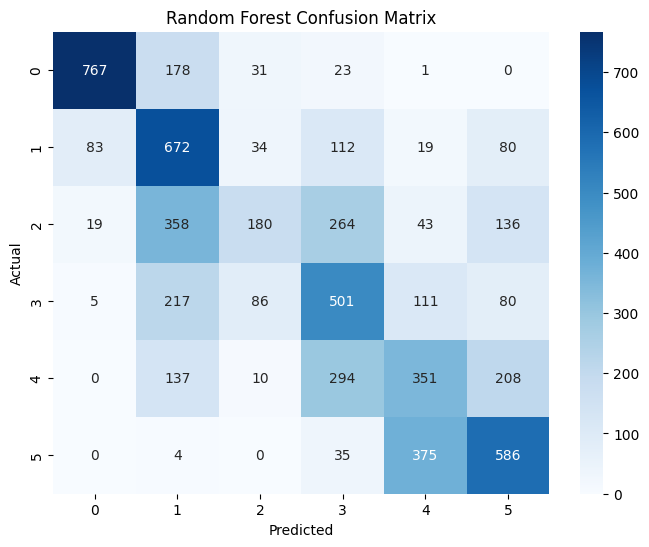


Gradient Boosting Classifier:
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1000
           1       0.43      0.63      0.51      1000
           2       0.36      0.22      0.27      1000
           3       0.35      0.38      0.37      1000
           4       0.33      0.27      0.30      1000
           5       0.56      0.60      0.58      1000

    accuracy                           0.48      6000
   macro avg       0.48      0.48      0.47      6000
weighted avg       0.48      0.48      0.47      6000



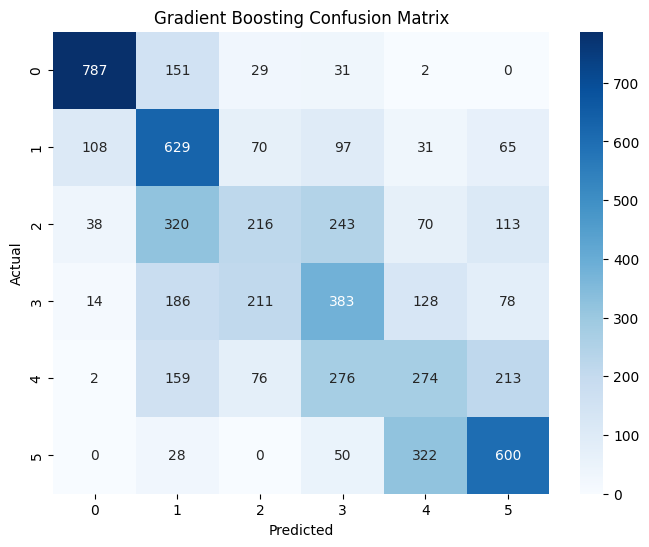


Support Vector Machine Classifier:
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1000
           1       0.41      0.49      0.45      1000
           2       0.32      0.25      0.28      1000
           3       0.28      0.19      0.22      1000
           4       0.28      0.26      0.27      1000
           5       0.46      0.72      0.56      1000

    accuracy                           0.44      6000
   macro avg       0.44      0.44      0.43      6000
weighted avg       0.44      0.44      0.43      6000



In [20]:
# Model Evaluation Results
results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_pred = model.predict(X_test_scaled)

    # Evaluation Metrics
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='weighted', zero_division=0)
    }

    # Print detailed report
    print(f"\n{name} Classifier:")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [21]:
# Compare Model Performance
print("\nModel Performance Comparison:")
performance_df = pd.DataFrame(results).T
print(performance_df)


Model Performance Comparison:
                        Accuracy  F1 Score  Precision    Recall
Random Forest           0.509500  0.498428   0.528303  0.509500
Gradient Boosting       0.481500  0.472359   0.477056  0.481500
Support Vector Machine  0.444167  0.433547   0.440522  0.444167


In [23]:
# Best Model Selection (based on highest accuracy)
best_model_name = max(results, key=lambda k: results[k]['Accuracy'])
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")


Best Model: Random Forest


In [24]:
# Save the best model and preprocessing artifacts
import joblib
joblib.dump(best_model, 'best_love_compatibility_model.joblib')
joblib.dump(scaler, 'love_compatibility_scaler.joblib')
joblib.dump(label_encoders, 'love_compatibility_label_encoders.joblib')


['love_compatibility_label_encoders.joblib']